Aim:

Observe the effect of different learning rates on the network on the given dataset.

B071

Bhavya Singhal

70022000199

BTech CE

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
#x->features, y->labels
# making 1000 samples, 2 features with 3 centers and clusters that have deviation of 0.3 about the centers
x,y = make_blobs(1000, 2, centers=3, cluster_std=2, random_state=2)

In [ ]:
x[0]

array([ 0.48719811, -0.43160548])

In [ ]:
y[0]

2

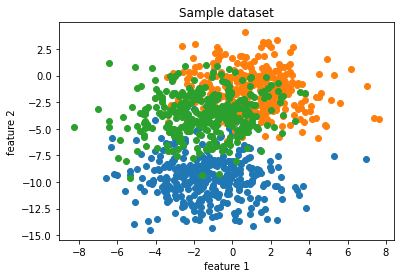

In [ ]:
for labels in range(3):
  row = np.where(y==labels)
  plt.title("Sample dataset")
  plt.xlabel("feature 1")
  plt.ylabel("feature 2")
  plt.scatter(x[row,0],x[row,1])

In [ ]:
y = to_categorical(y)

In [ ]:
y[0]

array([0., 0., 1.], dtype=float32)

In [ ]:
n_train = 800
train_x, test_x = x[:n_train, :],x[n_train:,:]
train_y, test_y = y[:n_train, :],y[n_train:,:]

In [ ]:
print(train_x.shape)
print(test_x.shape)

(800, 2)
(200, 2)


In [ ]:
from keras.layers import Dense

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from keras.metrics import CategoricalCrossentropy

In [ ]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(3, activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss= 'categorical_crossentropy', metrics='accuracy')

Epoch 1/200
25/25 [==============================] - 1s 10ms/step - loss: 1.0929 - accuracy: 0.4300 - val_loss: 0.9104 - val_accuracy: 0.4850
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.8954 - accuracy: 0.4750 - val_loss: 0.8163 - val_accuracy: 0.5250
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.8275 - accuracy: 0.5525 - val_loss: 0.7677 - val_accuracy: 0.6700
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7865 - accuracy: 0.6350 - val_loss: 0.7222 - val_accuracy: 0.6650
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7594 - accuracy: 0.6388 - val_loss: 0.6976 - val_accuracy: 0.7100
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.7370 - accuracy: 0.6525 - val_loss: 0.6773 - val_accuracy: 0.7150
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.7195 - accuracy: 0.6650 - val_loss: 0.6586 - val_accuracy: 0.7350
Epoch 8/200


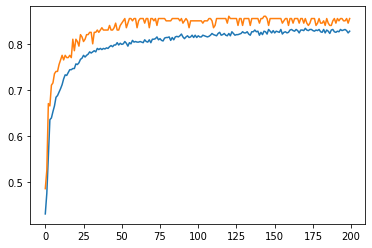

In [ ]:
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')

In [ ]:
def fit_model(train_x, train_y, test_x, test_y, lrate):
  model = Sequential()
  model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(3, activation=tf.nn.softmax))
  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lrate), loss= 'categorical_crossentropy', metrics='accuracy')
  history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=200)
  plt.plot(history.history['accuracy'],label='train')
  plt.plot(history.history['val_accuracy'],label='validation')
  plt.title('lrate = '+str(lrate))


Epoch 1/200
25/25 [==============================] - 1s 10ms/step - loss: 17.2023 - accuracy: 0.4475 - val_loss: 1.1154 - val_accuracy: 0.5550
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 1.2918 - accuracy: 0.5250 - val_loss: 0.9490 - val_accuracy: 0.6100
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 1.0468 - accuracy: 0.5562 - val_loss: 0.8934 - val_accuracy: 0.6600
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 1.0377 - accuracy: 0.5537 - val_loss: 0.8511 - val_accuracy: 0.6100
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.9555 - accuracy: 0.5775 - val_loss: 0.8678 - val_accuracy: 0.6350
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 1.0050 - accuracy: 0.5550 - val_loss: 0.8947 - val_accuracy: 0.5700
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.9030 - accuracy: 0.5925 - val_loss: 0.8258 - val_accuracy: 0.6800
Epoch 8/200

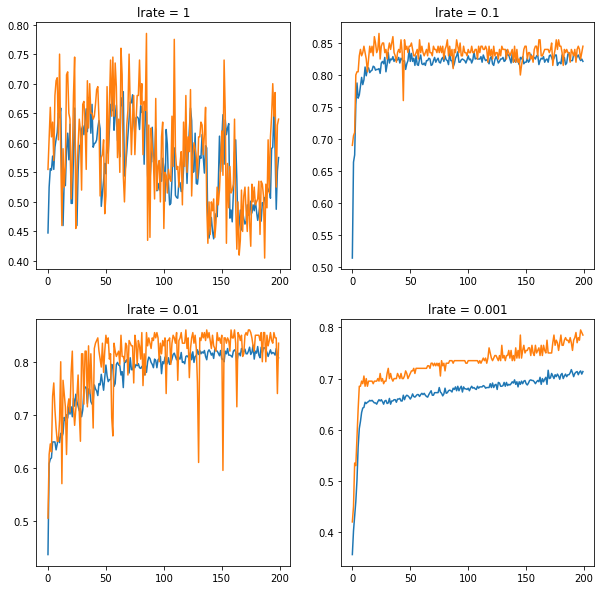

In [ ]:
learning_rates = [1, 0.1, 0.01, 0.001]

plt.figure(figsize= (10,10))

for i in range(len(learning_rates)):
  plt.subplot(2,2,i+1)
  fit_model(train_x, train_y, test_x, test_y, learning_rates[i])

  


Conclusion:

Artificial NN with 1 hidden layer is built to clasify 3 classes of the given dataset.

SGD algorithm is used with different learning rates to train the network to classify the samples.

Results show that:





 

*   For learning rate = 1, training and validation accuracy is oscillating. This is because the learning rate is too high for the given network.
*   For learning rate = 0.1, oscillations are reduced and training and validation accuracy are almost the same. Validation accuracy is in range 0.82 to 0.85 and training accuracy is in range 0.80 and 0.82.
*   For learning rate = 0.01, validation accuracy is higher than training accuracy. This shows that the network should be added with more hidden layers and neurons.
*   For learning rate = 0.001, training and validation accuracies are lesser than that of learning rate = 0.01.

Learning rate of 0.1 is giving best results amongst the 4 learning rates and the validation and training accuracies are almost same.





